# What is brain tumor?
A brain tumor is a growth of abnormal cells in the brain. The anatomy of the brain is very
complex, with different parts responsible for different nervous system. Brain Tumor can
develop in any part of the brain or skull, including its protective lining, the underside of the brain(skull base), the brainstem, the sinuses and the nasal cavity, and many other areas.

Brain tumors can be cancerous(malignant) or noncancerous(benign).When benign or malignant
tumors grow, they can cause the pressure inside skull to increase. This can cause brain damage, and it can be life-threating.

However, Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patient life.
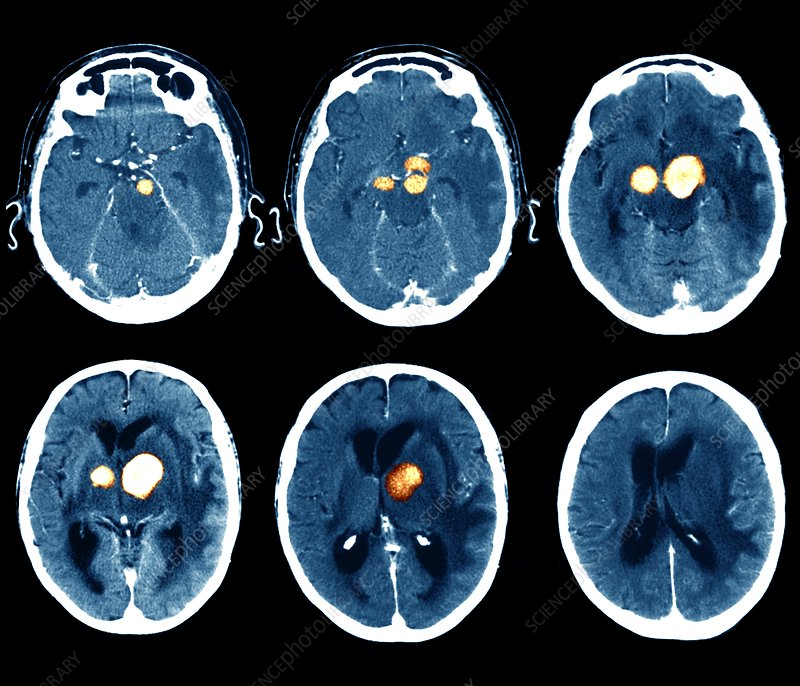
![800wm.jpg](attachment:3e14e405-9a2e-48f4-94bf-11a876ec8a40.jpg)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df= pd.read_csv('../kaggle/input1/data.csv')

In [3]:
df.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [4]:
df.tail()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
31,31,488,564,-29,1303,-9,1236,265,2203,41,...,16,0,109,21,6,-15,11,7,-145,Normal
32,32,164,330,-13,721,12,504,154,1381,78,...,-18,1,-1484,-4,-1,-1,3,-5,-63,Normal
33,33,1282,116,-4,542,0,1070,344,1903,42,...,5,3,128,25,2,0,7,3,-69,Normal
34,34,68,718,-50,1816,-28,251,38,598,73,...,47,-2,190,3,0,8,21,22,-214,Normal
35,35,928,332,4,412,0,681,267,1132,357,...,9,1,67,19,10,1,32,-5,72,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

# Drop Unnamed Column

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.columns

Index(['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7465)

# Check Unique Values in data

In [9]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

# Statistical Information of data

In [10]:
df.describe()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,378.750000,177.305556,128.027778,568.305556,93.555556,366.833333,140.166667,644.194444,73.444444,68.055556,...,31.750000,71.111111,35.694444,53.194444,38.388889,40.944444,41.222222,57.027778,58.694444,44.027778
std,648.716067,243.494655,787.935802,637.451928,557.527370,427.166645,171.443202,685.514231,88.504219,90.766244,...,50.036201,118.940748,127.437115,269.630628,47.619490,83.763935,251.147778,71.322001,336.030766,224.891782
min,-694.000000,-117.000000,-50.000000,8.000000,-54.000000,-6.000000,-18.000000,-8.000000,-8.000000,-14.000000,...,-21.000000,-24.000000,-12.000000,-1484.000000,-73.000000,-16.000000,-23.000000,-5.000000,-17.000000,-214.000000
25%,-95.750000,-31.000000,-13.250000,47.250000,-7.000000,27.250000,17.750000,33.250000,8.250000,-0.250000,...,1.500000,9.000000,-1.250000,59.250000,12.750000,3.500000,-4.750000,7.000000,-5.000000,-72.750000
50%,194.500000,117.000000,-4.500000,293.500000,3.000000,110.500000,37.500000,333.500000,37.500000,23.500000,...,10.000000,55.500000,3.000000,94.000000,36.000000,7.000000,0.000000,20.000000,1.500000,-12.000000
75%,721.750000,330.500000,14.000000,1079.250000,10.250000,675.000000,268.500000,1185.250000,107.750000,109.250000,...,48.000000,78.750000,6.000000,121.250000,64.000000,39.500000,6.500000,98.250000,7.000000,74.250000
max,1815.000000,718.000000,4723.000000,2261.000000,3344.000000,1354.000000,718.000000,2203.000000,357.000000,357.000000,...,156.000000,686.000000,686.000000,251.000000,138.000000,444.000000,1505.000000,271.000000,2018.000000,1089.000000


In [11]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Label Encoding

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])

In [13]:
df['y'].unique()

array([1, 0])

# Split datset into training and testing data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Training data

In [15]:
X_train

array([[-378,   31,  -29, ...,   97,    0,  -51],
       [  71, -117,   -1, ...,  114,    1, 1089],
       [ 475,  -79,   20, ...,   76,   11,   22],
       ...,
       [-346,  -35,   37, ...,   30,   -5,  -53],
       [-357,    6,   20, ...,   52,   -1,  -72],
       [1122,  416,   -7, ...,   16,  -17,  -10]])

In [16]:
y_train

array(['tumor', 'tumor', 'tumor', 'Normal', 'tumor', 'tumor', 'Normal',
       'tumor', 'Normal', 'tumor', 'tumor', 'tumor', 'Normal', 'tumor',
       'Normal', 'tumor', 'Normal', 'Normal', 'Normal', 'tumor', 'Normal',
       'Normal', 'Normal', 'tumor', 'Normal', 'tumor', 'tumor', 'Normal'],
      dtype=object)

# Testing data

In [17]:
X_test

array([[ 928,  332,    4, ...,   32,   -5,   72],
       [-694,  -45,  -34, ...,  179,   -1, -139],
       [ 632,  185, 4723, ...,    3,   -4, -103],
       ...,
       [ 488,  564,  -29, ...,   11,    7, -145],
       [ 462,  379,  -21, ...,   10,   -5,   66],
       [ 465, -104,    5, ...,  131,   -5,  267]])

In [18]:
y_test

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

# Transformation of data

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Shape of X_train and y_train

In [20]:
print(X_train.shape)
print(y_train.shape)

(28, 7464)
(28,)


# Machine Learning(Classification)

- Logistic Regression
- KNN(KNearest Neighbors)
- Random Forest Classifier
- Decision Tree Classifier

# Logistic Regression

In [21]:
# build the model
from sklearn.linear_model import LogisticRegression
# Fit LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Prediction
y_predict = log_reg.predict(X_test)
y_predict

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

In [23]:
## Accuracy
score = log_reg.score(X_test, y_test)
print(score)

1.0


In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[5, 0],
       [0, 3]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         5
       tumor       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Score :  1.0


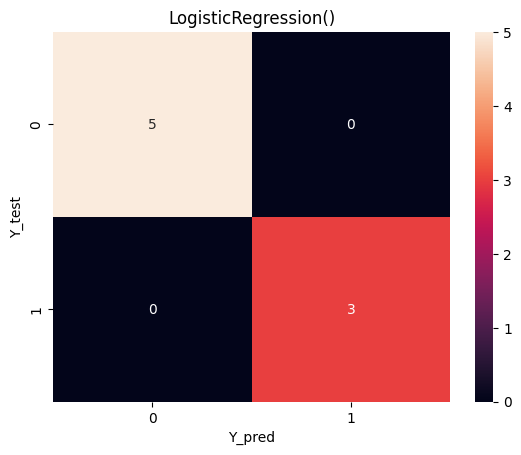

In [26]:
# Plotting of Confusion Matrics of Logistic Regression
from sklearn.metrics import confusion_matrix
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# KNearest Neighbors

In [27]:
# Build the model
from sklearn.neighbors import KNeighborsClassifier
# Fit KNN Classifier
KNN = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Prediction
y_predict = KNN.predict(X_test)
y_predict

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

In [29]:
# Accuracy Score
score = KNN.score(X_test, y_test)
print(score)

1.0


In [30]:
# Confusion Metrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[5, 0],
       [0, 3]])

In [31]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         5
       tumor       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Score :  1.0


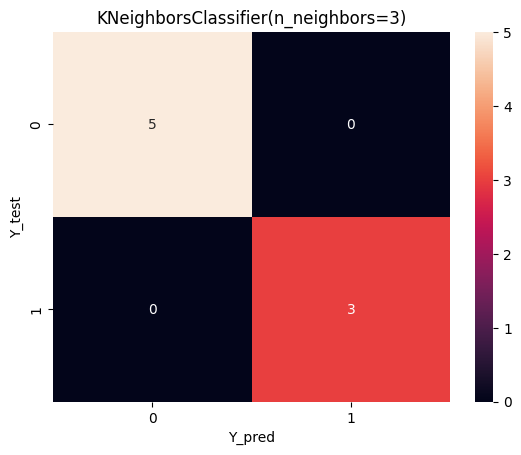

In [32]:
# Plotting of Confusion Matrix of KNN
from sklearn.metrics import confusion_matrix
pred_list = [KNN]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# RandomForestClassifier

In [33]:
# Build Model
from sklearn.ensemble import RandomForestClassifier
# Fit RandomForest Clsassifier
RFC = RandomForestClassifier(n_estimators=20, random_state=0)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [34]:
# Prediction
y_predict = RFC.predict(X_test)
y_predict

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

In [35]:
# Accuracy Score
score = RFC.score(X_test, y_test)
print(score)

1.0


Score :  1.0


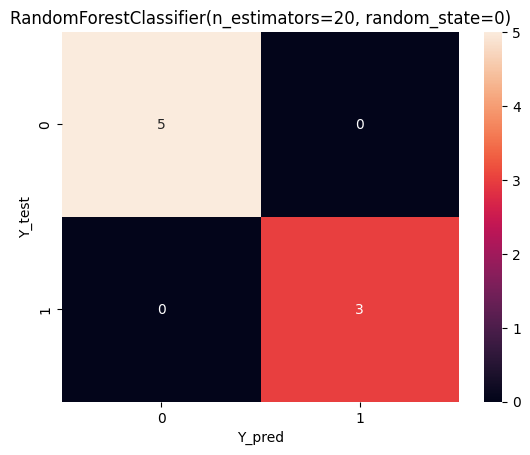

In [36]:
# Plotting of confusion matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix
pred_list = [RFC]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# DecisionTreeClassifier

In [37]:
# Build the model
from sklearn.tree import DecisionTreeClassifier
# Fit DecisionTree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
#prediction
y_predict = DTC.predict(X_test)
y_predict

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

In [39]:
# Accuracy Score
score = DTC.score(X_test, y_test)
print(score)

1.0


Score :  1.0


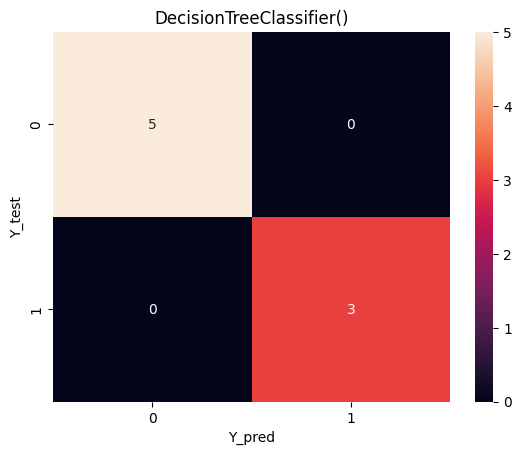

In [40]:
# Plotting of Confusion Matrix of Decision Tree Classifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_list = [DTC]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

**Our Team Goals : Earlier andmore accurate diagnosis, Improved patient outcomes, Reduced healthcare burden.**

**This project delivered by SMN Team**

**Hopefully the explanation of each program code above can be useful for the future, Best Wishes!**